In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
cityvect=["g","l","s","v"]
cityname=["Girona","Lleida","Sabadell","Valls"]

In [5]:
gpartida=pd.read_csv("Girona_partida.csv")
gronda=pd.read_csv("Girona_ronda.csv")
guser=pd.read_csv("Girona_user.csv")
guserronda=pd.read_csv("Girona_userronda.csv")
lpartida=pd.read_csv("Lleida_partida.csv")
lronda=pd.read_csv("Lleida_ronda.csv")
luser=pd.read_csv("Lleida_user.csv")
luserronda=pd.read_csv("Lleida_userronda.csv")
spartida=pd.read_csv("Sabadell_partida.csv")
sronda=pd.read_csv("Sabadell_ronda.csv")
suser=pd.read_csv("Sabadell_user.csv")
suserronda=pd.read_csv("Sabadell_userronda.csv")
vpartida=pd.read_csv("Valls_partida.csv")
vronda=pd.read_csv("Valls_ronda.csv")
vuser=pd.read_csv("Valls_user.csv")
vuserronda=pd.read_csv("Valls_userronda.csv")
display(gpartida)

,id,num_partida,data_creacio,data_inicialitzacio,data_finalitzacio,classe,num_rondes,usuaris_registrats,guanyen_igualment,objectiu_aconseguit
0,1,1,2017-03-24 12:24:07.262591,2017-03-24 12:38:09.444109,2017-03-24 12:41:52.235340,GIRONA,10,6,0,1
1,2,2,2017-03-24 12:38:20.302779,2017-03-24 12:42:09.867887,2017-03-24 12:46:32.519539,GIRONA,10,6,0,1
2,3,3,2017-03-24 12:51:29.191295,2017-03-24 13:02:05.991295,2017-03-24 13:06:09.200062,GIRONA,10,6,0,1
3,4,4,2017-03-24 13:02:16.659111,2017-03-24 13:09:10.743684,2017-03-24 13:12:57.744570,GIRONA,10,6,0,1
4,5,5,2017-03-24 13:09:13.496563,2017-03-24 13:25:25.840485,2017-03-24 13:28:53.308187,GIRONA,10,6,1,1
5,6,6,2017-03-24 13:25:32.261539,2017-03-24 13:29:28.287964,2017-03-24 13:32:49.884437,GIRONA,10,6,0,1
6,7,7,2017-03-24 13:29:38.224052,2017-03-24 13:47:22.217176,2017-03-24 13:50:59.385334,GIRONA,10,6,0,1
7,8,8,2017-03-24 13:47:25.449838,2017-03-24 13:51:51.000365,2017-03-24 13:56:30.400589,GIRONA,10,6,1,1
8,9,9,2017-03-24 14:00:18.075564,2017-03-24 14:11:14.688552,2017-03-24 14:15:13.186254,GIRONA,10,6,0,1
9,10,10,2017-03-24 14:11:16.676653,2017-03-24 14:20:15.161814,2017-03-24 14:23:20.465281,GIRONA,10,6,0,1


In [4]:
# gràfics que no interessen perquè tothom comença amb 40€:
    # mean end capital as a function of start capital
    # relative contributions as a function of start capital with boxplot

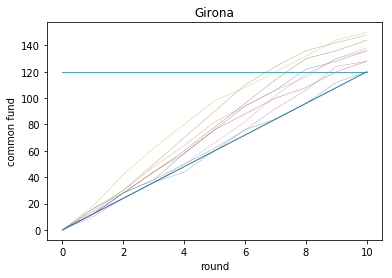

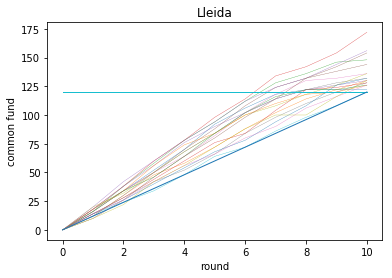

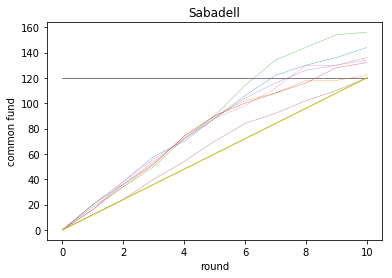

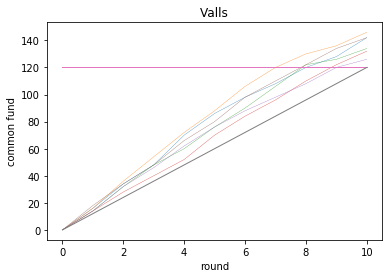

In [5]:
# evolution of funds through the rounds
for m in range(4):
    exec("rounddf="+cityvect[m]+"ronda")
    roundi=list(range(0,11))
    roundlist=(0,1,2,3,4,5,6,7,8,9,10)
    for i in range(1,max(rounddf["partida_id"])):
        roundi=rounddf.loc[rounddf["partida_id"]==i]
        roundi=roundi[["bucket_final_ronda"]]
        for j in range (10,0,-1):
            roundi.loc[j+10*(i-1),"bucket_final_ronda"]=120-roundi.loc[(j-1)+10*(i-1),"bucket_final_ronda"]
        roundi.loc[10*(i-1),"bucket_final_ronda"]=0
        plt.plot(roundlist,roundi["bucket_final_ronda"],lw=0.3)
    plt.plot(roundlist,(120,120,120,120,120,120,120,120,120,120,120),lw=1,label="threshold")
    plt.plot(roundlist,(0,12,24,36,48,60,72,84,96,108,120),lw=1,label="cumulative fair contribution")
    plt.xlabel("round")
    plt.ylabel("common fund")
    plt.title(cityname[m])
    plt.show()

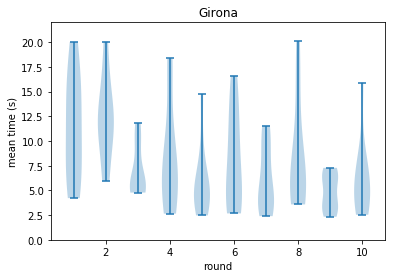

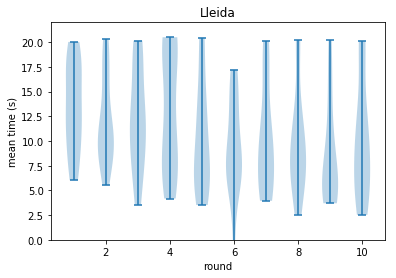

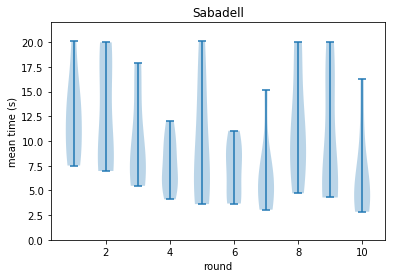

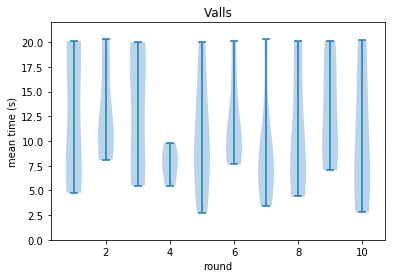

In [6]:
# mean time for each round with violinplot (separate plots)
for m in range(4):
    exec("rounddf="+cityvect[m]+"ronda")
    t1=rounddf["temps_inici_ronda"]
    t2=rounddf["temps_final_ronda"]
    mcs=t2.str[-6:].astype(int)-t1.str[-6:].astype(int)
    sec=t2.str[-9:-7].astype(int)-t1.str[-9:-7].astype(int)
    mnt=t2.str[-12:-10].astype(int)-t1.str[-12:-10].astype(int)
    hr=t2.str[-15:-13].astype(int)-t1.str[-15:-13].astype(int)
    rounddf["time"]=3600*hr.astype(float)+60*mnt.astype(float)+sec.astype(float)+mcs.astype(float)/1000000.0
    timebyround=[[],[],[],[],[],[],[],[],[],[]]
    for k in range(len(rounddf)):
        timebyround[k%10].append(rounddf.loc[k,"time"])
    plt.violinplot(timebyround,positions=[1,2,3,4,5,6,7,8,9,10])
    plt.xlabel("round")
    plt.ylabel("mean time (s)")
    plt.ylim([0,22])
    plt.title(cityname[m])
    plt.show()

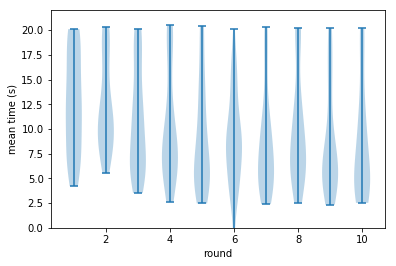

In [8]:
# mean time for each round with violinplot (one plot)
timebyround=[[],[],[],[],[],[],[],[],[],[]]
for m in range(4):
    exec("rounddf="+cityvect[m]+"ronda")
    t1=rounddf["temps_inici_ronda"]
    t2=rounddf["temps_final_ronda"]
    mcs=t2.str[-6:].astype(int)-t1.str[-6:].astype(int)
    sec=t2.str[-9:-7].astype(int)-t1.str[-9:-7].astype(int)
    mnt=t2.str[-12:-10].astype(int)-t1.str[-12:-10].astype(int)
    hr=t2.str[-15:-13].astype(int)-t1.str[-15:-13].astype(int)
    rounddf["time"]=3600*hr.astype(float)+60*mnt.astype(float)+sec.astype(float)+mcs.astype(float)/1000000.0
    for k in range(len(rounddf)):
        timebyround[k%10].append(rounddf.loc[k,"time"])
plt.violinplot(timebyround,positions=[1,2,3,4,5,6,7,8,9,10])
plt.xlabel("round")
plt.ylabel("mean time (s)")
plt.ylim([0,22])
plt.show()

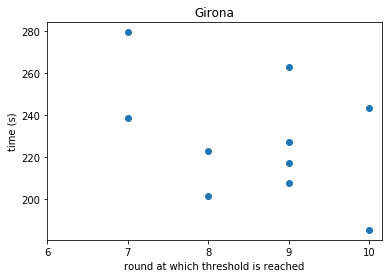

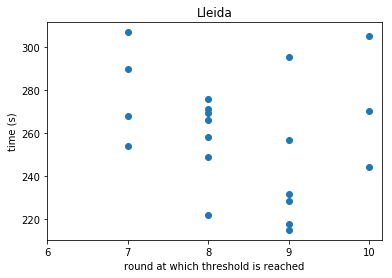

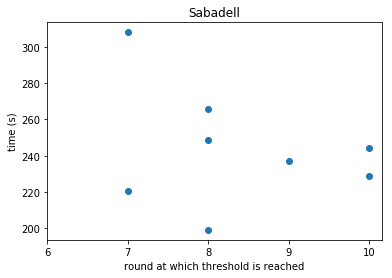

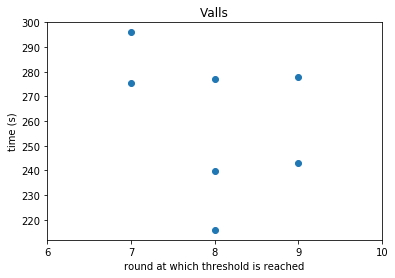

In [8]:
# correlation between time and round with threshold achieved (separate plots)
for m in range(4):
    exec("rounddf="+cityvect[m]+"ronda")
    exec("sessiondf="+cityvect[m]+"partida")
    t1=sessiondf["data_inicialitzacio"]
    t2=sessiondf["data_finalitzacio"]
    mcs=t2.str[-6:].astype(int)-t1.str[-6:].astype(int)
    sec=t2.str[-9:-7].astype(int)-t1.str[-9:-7].astype(int)
    mnt=t2.str[-12:-10].astype(int)-t1.str[-12:-10].astype(int)
    hr=t2.str[-15:-13].astype(int)-t1.str[-15:-13].astype(int)
    sessiondf["time"]=3600*hr.astype(float)+60*mnt.astype(float)+sec.astype(float)+mcs.astype(float)/1000000.0
    thresholdround=[]
    for k in range(len(rounddf)):
        pot1=rounddf.loc[k,"bucket_inici_ronda"]
        pot2=rounddf.loc[k,"bucket_final_ronda"]
        if ((pot1*pot2<0)or((pot1*pot2==0)and(pot1>0 or pot2>0))):
            thresholdround.append(rounddf.loc[k,"num_ronda"])
    thresholdround=pd.DataFrame(thresholdround)
    plt.scatter(thresholdround,sessiondf["time"])
    plt.xlabel("round at which threshold is reached")
    plt.ylabel("time (s)")
    plt.xticks([6,7,8,9,10])
    plt.title(cityname[m])
    plt.show()

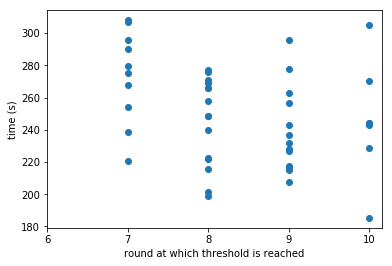

In [9]:
# correlation between time and round with threshold achieved (one plot)
thresholdround=[]
sessiontime=[]
for m in range(4):
    exec("rounddf="+cityvect[m]+"ronda")
    exec("sessiondf="+cityvect[m]+"partida")
    t1=sessiondf["data_inicialitzacio"]
    t2=sessiondf["data_finalitzacio"]
    mcs=t2.str[-6:].astype(int)-t1.str[-6:].astype(int)
    sec=t2.str[-9:-7].astype(int)-t1.str[-9:-7].astype(int)
    mnt=t2.str[-12:-10].astype(int)-t1.str[-12:-10].astype(int)
    hr=t2.str[-15:-13].astype(int)-t1.str[-15:-13].astype(int)
    for k in range(len(sessiondf)):
        sessiontime.append(3600*hr[k].astype(float)+60*mnt[k].astype(float)+sec[k].astype(float)+mcs[k].astype(float)/1000000.0)
    for k in range(len(rounddf)):
        pot1=rounddf.loc[k,"bucket_inici_ronda"]
        pot2=rounddf.loc[k,"bucket_final_ronda"]
        if ((pot1*pot2<0)or((pot1*pot2==0)and(pot1>0 or pot2>0))):
            thresholdround.append(rounddf.loc[k,"num_ronda"])
thresholdround=pd.DataFrame(thresholdround)
sessiontime=pd.DataFrame(sessiontime)
plt.scatter(thresholdround,sessiontime)
plt.xlabel("round at which threshold is reached")
plt.ylabel("time (s)")
plt.xticks([6,7,8,9,10])
plt.show()

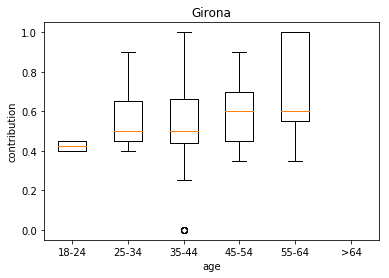

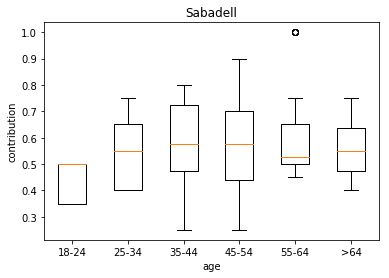

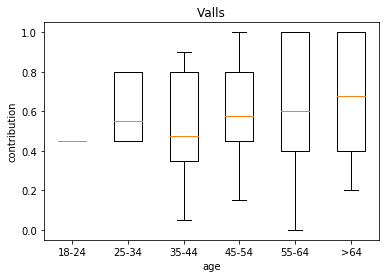

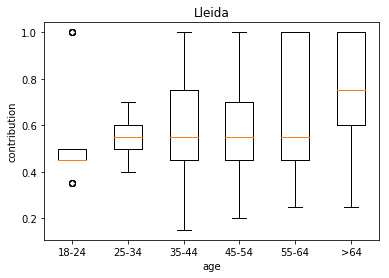

In [10]:
# contribution dependence on age (separate plots)
for m in (0,2,3):
    exec("userdf="+cityvect[m]+"user")
    data=[[],[],[],[],[],[]]
    for k in range(6):
        for i in range(len(userdf)):
            if (userdf.loc[i,"rang_edat"]=="r1"):
                data[0].append(1-userdf.loc[i,"guany_final"]/40)
            elif (userdf.loc[i,"rang_edat"]=="r2"):
                data[1].append(1-userdf.loc[i,"guany_final"]/40)
            elif (userdf.loc[i,"rang_edat"]=="r3"):
                data[2].append(1-userdf.loc[i,"guany_final"]/40)
            elif (userdf.loc[i,"rang_edat"]=="r4"):
                data[3].append(1-userdf.loc[i,"guany_final"]/40)
            elif (userdf.loc[i,"rang_edat"]=="r5"):
                data[4].append(1-userdf.loc[i,"guany_final"]/40)
            elif (userdf.loc[i,"rang_edat"]=="r6"):
                data[5].append(1-userdf.loc[i,"guany_final"]/40)
    plt.boxplot(data,positions=[1,2,3,4,5,6])
    plt.xticks([1,2,3,4,5,6],["18-24","25-34","35-44","45-54","55-64",">64"])
    plt.xlabel("age")
    plt.ylabel("contribution")
    plt.title(cityname[m])
    plt.show()
# plot de Lleida, les dades de l'edat són numèriques i no per rangs:
exec("userdf=luser")
data=[[],[],[],[],[],[]]
for k in range(6):
    for i in range(len(userdf)):
        if (userdf.loc[i,"rang_edat"]>=18 and userdf.loc[i,"rang_edat"]<25):
            data[0].append(1-userdf.loc[i,"guany_final"]/40)
        elif (userdf.loc[i,"rang_edat"]>=25 and userdf.loc[i,"rang_edat"]<35):
            data[1].append(1-userdf.loc[i,"guany_final"]/40)
        elif (userdf.loc[i,"rang_edat"]>=35 and userdf.loc[i,"rang_edat"]<45):
            data[2].append(1-userdf.loc[i,"guany_final"]/40)
        elif (userdf.loc[i,"rang_edat"]>=45 and userdf.loc[i,"rang_edat"]<55):
            data[3].append(1-userdf.loc[i,"guany_final"]/40)
        elif (userdf.loc[i,"rang_edat"]>=55 and userdf.loc[i,"rang_edat"]<65):
            data[4].append(1-userdf.loc[i,"guany_final"]/40)
        elif (userdf.loc[i,"rang_edat"]>=65):
            data[5].append(1-userdf.loc[i,"guany_final"]/40)
plt.boxplot(data,positions=[1,2,3,4,5,6])
plt.xticks([1,2,3,4,5,6],["18-24","25-34","35-44","45-54","55-64",">64"])
plt.xlabel("age")
plt.ylabel("contribution")
plt.title("Lleida")
plt.show()

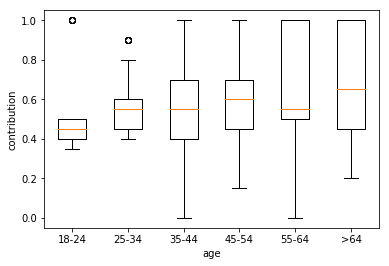

In [11]:
# contribution dependence on age (one plot)
data=[[],[],[],[],[],[]]
for m in (0,2,3):
    exec("userdf="+cityvect[m]+"user")
    for k in range(6):
        for i in range(len(userdf)):
            if (userdf.loc[i,"rang_edat"]=="r1"):
                data[0].append(1-userdf.loc[i,"guany_final"]/40)
            elif (userdf.loc[i,"rang_edat"]=="r2"):
                data[1].append(1-userdf.loc[i,"guany_final"]/40)
            elif (userdf.loc[i,"rang_edat"]=="r3"):
                data[2].append(1-userdf.loc[i,"guany_final"]/40)
            elif (userdf.loc[i,"rang_edat"]=="r4"):
                data[3].append(1-userdf.loc[i,"guany_final"]/40)
            elif (userdf.loc[i,"rang_edat"]=="r5"):
                data[4].append(1-userdf.loc[i,"guany_final"]/40)
            elif (userdf.loc[i,"rang_edat"]=="r6"):
                data[5].append(1-userdf.loc[i,"guany_final"]/40)
exec("userdf=luser")
for k in range(6):
    for i in range(len(userdf)):
        if (userdf.loc[i,"rang_edat"]>=18 and userdf.loc[i,"rang_edat"]<25):
            data[0].append(1-userdf.loc[i,"guany_final"]/40)
        elif (userdf.loc[i,"rang_edat"]>=25 and userdf.loc[i,"rang_edat"]<35):
            data[1].append(1-userdf.loc[i,"guany_final"]/40)
        elif (userdf.loc[i,"rang_edat"]>=35 and userdf.loc[i,"rang_edat"]<45):
            data[2].append(1-userdf.loc[i,"guany_final"]/40)
        elif (userdf.loc[i,"rang_edat"]>=45 and userdf.loc[i,"rang_edat"]<55):
            data[3].append(1-userdf.loc[i,"guany_final"]/40)
        elif (userdf.loc[i,"rang_edat"]>=55 and userdf.loc[i,"rang_edat"]<65):
            data[4].append(1-userdf.loc[i,"guany_final"]/40)
        elif (userdf.loc[i,"rang_edat"]>=65):
            data[5].append(1-userdf.loc[i,"guany_final"]/40)
plt.boxplot(data,positions=[1,2,3,4,5,6])
plt.xticks([1,2,3,4,5,6],["18-24","25-34","35-44","45-54","55-64",">64"])
plt.xlabel("age")
plt.ylabel("contribution")
plt.show()

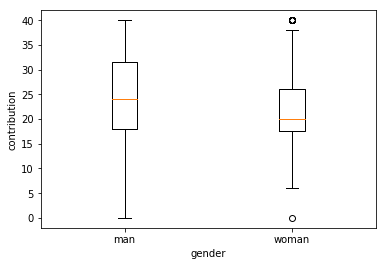

In [12]:
# contribution dependence on gender
data=[[],[]]
for m in range(4):
    exec("userdf="+cityvect[m]+"user")
    for i in range(len(userdf)):
        if (userdf.loc[i,"genere"]=="h"):
            data[0].append(40-userdf.loc[i,"guany_final"])
        if (userdf.loc[i,"genere"]=="d"):
            data[1].append(40-userdf.loc[i,"guany_final"])
plt.boxplot(data,positions=[0,1])
plt.xticks([0,1],["man","woman"])
plt.xlabel("gender")
plt.ylabel("contribution")
plt.show()

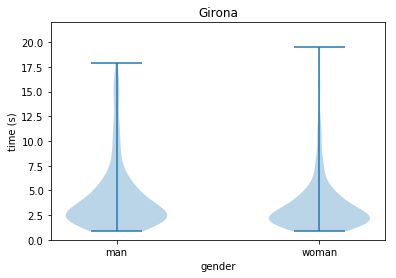

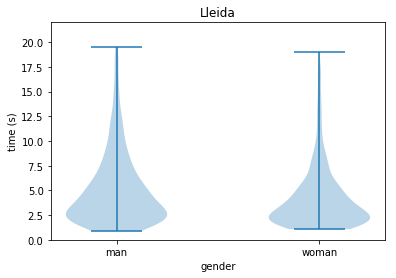

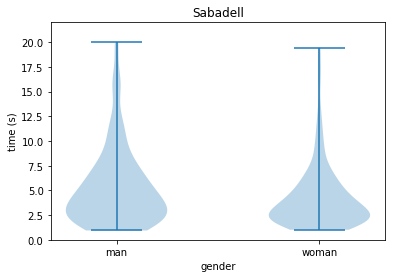

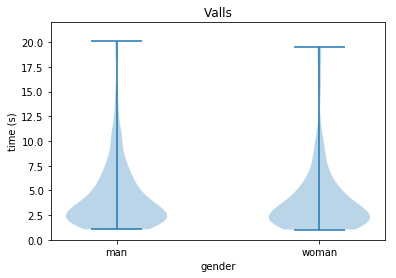

In [12]:
# mean time depending on gender
for m in range(4):
    data=[[],[]]
    exec("userrounddf="+cityvect[m]+"userronda")
    exec("rounddf="+cityvect[m]+"ronda")
    exec("userdf="+cityvect[m]+"user")
    for i in range(len(userrounddf)):
        userrounddf.loc[i,"temps_inicial"]=rounddf.loc[i//6,"temps_inici_ronda"]
    for j in range(len(userrounddf)):
        if (pd.isna(userrounddf.loc[j,"temps_seleccio"])==False and pd.isna(userrounddf.loc[j,"temps_inicial"])==False):
            time1=str(userrounddf.loc[j,"temps_seleccio"])
            time0=str(userrounddf.loc[j,"temps_inicial"])
            mcs=float(time1[-6:])-float(time0[-6:])
            sec=float(time1[-9:-7])-float(time0[-9:-7])
            mnt=float(time1[-12:-10])-float(time0[-12:-10])
            hr=float(time1[-15:-13])-float(time0[-15:-13])
            time=3600.0*hr+60.0*mnt+sec+mcs/1000000.0
            if ((m==1 and userrounddf.loc[j,"user_id"]>42) or (m==3 and userrounddf.loc[j,"user_id"]>17)):
                # modificació perquè no hi ha user_id=42 a Lleida ni user_id=17 a Valls
                if (userdf.loc[userrounddf.loc[j,"user_id"]-2,"genere"]=="h" and time>=0):
                    data[0].append(time)
                elif (userdf.loc[userrounddf.loc[j,"user_id"]-2,"genere"]=="d" and time>=0):
                    data[1].append(time)
            else:
                if (userdf.loc[userrounddf.loc[j,"user_id"]-1,"genere"]=="h" and time>=0):
                    data[0].append(time)
                elif (userdf.loc[userrounddf.loc[j,"user_id"]-1,"genere"]=="d" and time>=0):
                    data[1].append(time)
    plt.violinplot(data,positions=[0,1])
    plt.xticks([0,1],["man","woman"])
    plt.xlabel("gender")
    plt.ylabel("time (s)")
    plt.ylim([0,22])
    plt.title(cityname[m])
    plt.show()

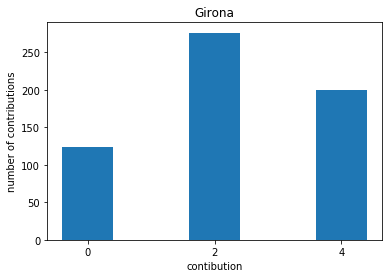

0.20666666666666667 0.46 0.3333333333333333


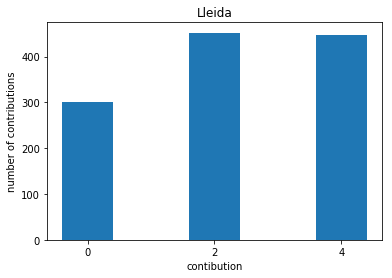

0.25 0.37666666666666665 0.37333333333333335


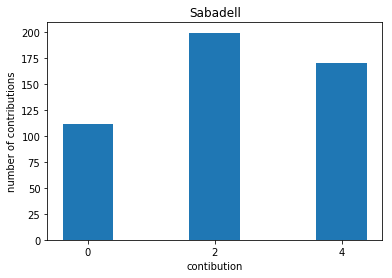

0.23125 0.41458333333333336 0.3541666666666667


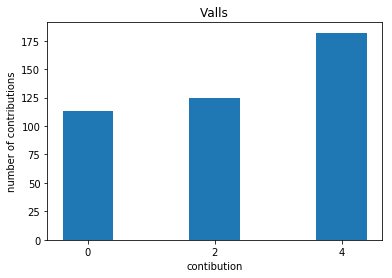

0.26904761904761904 0.2976190476190476 0.43333333333333335


In [17]:
# number of contribution of each value
for m in range(4):
    exec("userrounddf="+cityvect[m]+"userronda")
    exec("rounddf="+cityvect[m]+"ronda")
    count=[0,0,0]
    for i in range(len(userrounddf)):
        for n in range(3):
            if (userrounddf.loc[i,"seleccio"]==2*n):
                count[n]+=1
    plt.bar([0,2,4],count)
    plt.xticks([0,2,4],[0,2,4])
    plt.xlabel("contibution")
    plt.ylabel("number of contributions")
    plt.title(cityname[m])
    plt.show()
    print(count[0]/len(userrounddf),count[1]/len(userrounddf),count[2]/len(userrounddf))

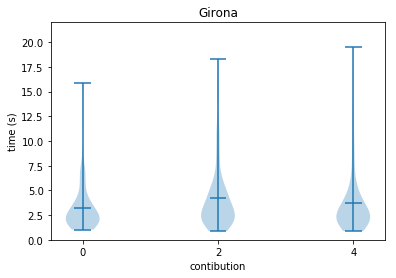

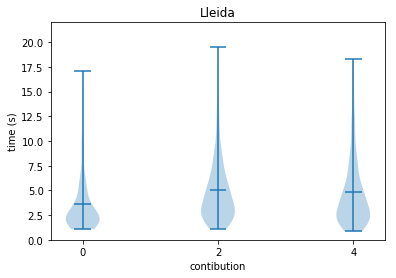

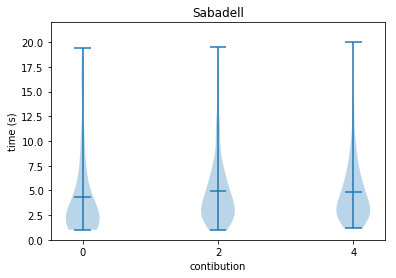

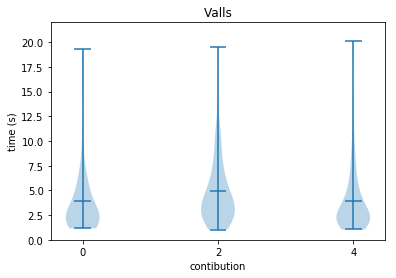

In [18]:
# mean time depending on contribution
for m in range(4):
    exec("userrounddf="+cityvect[m]+"userronda")
    exec("rounddf="+cityvect[m]+"ronda")
    time2=[[],[],[]]
    for j in range(len(userrounddf)):
        userrounddf.loc[j,"temps_inicial"]=rounddf.loc[j//6,"temps_inici_ronda"]
    for i in range(len(userrounddf)):
        if (pd.isna(userrounddf.loc[i,"temps_seleccio"])==False and pd.isna(userrounddf.loc[i,"temps_inicial"])==False):
            time1=str(userrounddf.loc[i,"temps_seleccio"])
            time0=str(userrounddf.loc[i,"temps_inicial"])
            mcs=float(time1[-6:])-float(time0[-6:])
            sec=float(time1[-9:-7])-float(time0[-9:-7])
            mnt=float(time1[-12:-10])-float(time0[-12:-10])
            hr=float(time1[-15:-13])-float(time0[-15:-13])
            time=3600.0*hr+60.0*mnt+sec+mcs/1000000.0
            for n in [0,1,2]:
                if (userrounddf.loc[i,"seleccio"]==2*n and time>=0):
                    time2[n].append(time)
    plt.violinplot(time2,positions=[0,2,4],showmeans=True)
    plt.xticks([0,2,4],[0,2,4])
    plt.xlabel("contibution")
    plt.ylabel("time (s)")
    plt.ylim([0,22])
    plt.title(cityname[m])
    plt.show()

In [6]:
# Gini coefficient
def gini(dataset):
    sum1=0.0
    sum2=0.0
    n=len(dataset)
    for i in range(n):
        sum1+=dataset[i]
        for j in range(n):
            sum2+=abs(dataset[i]-dataset[j])
    gini=sum2/(2*n*sum1)
    return gini
for m in range(4):
    exec("userdf="+cityvect[m]+"user")
    income=[]
    for k in range(len(userdf)):
        if (math.isnan(float(userdf.loc[k,"partida_id"]))==False):
            income.append(int(userdf.loc[k,"guany_final"]))
    print("Gini coefficient ("+cityname[m]+"):",gini(income))

Gini coefficient (Girona): 0.2532299741602067
Gini coefficient (Lleida): 0.31163538408063957
Gini coefficient (Sabadell): 0.21390562248995984
Gini coefficient (Valls): 0.39320935474781626


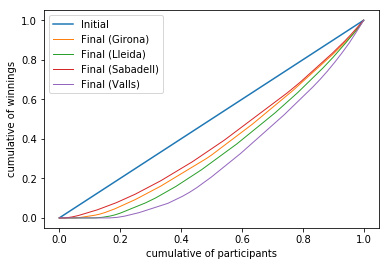

In [9]:
# Lorenz curve
def lorenz(dataset,Label):
    cumulative=[0]
    xaxis=[0]
    for i in range(len(dataset)):
        cumulative.append(cumulative[i]+dataset[i])
        xaxis.append((i+1)/len(dataset))
    for i in range(len(dataset)+1):
        cumulative[i]=cumulative[i]/max(cumulative)
    plt.plot(xaxis,cumulative,lw=1,label=Label)
    return
plt.plot([0,1],[0,1],label="Initial")
for m in range(4):
    exec("userdf="+cityvect[m]+"user")
    income=[]
    for k in range(len(userdf)):
        if (math.isnan(float(userdf.loc[k,"partida_id"]))==False):
            income.append(int(userdf.loc[k,"guany_final"]))
    income.sort()
    lorenz(income,"Final ("+cityname[m]+")")
plt.xlabel("cumulative of participants")
plt.ylabel("cumulative of winnings")
plt.legend()
plt.show()

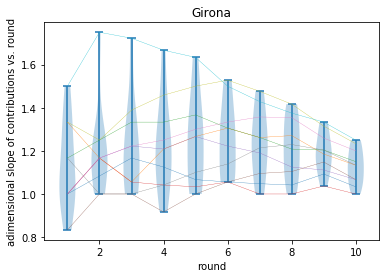

0.8333333333333334 1.75


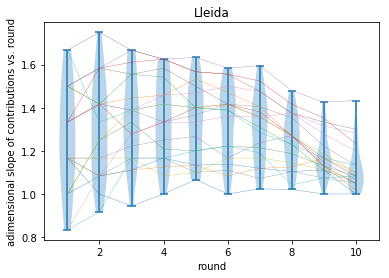

0.8333333333333334 1.75


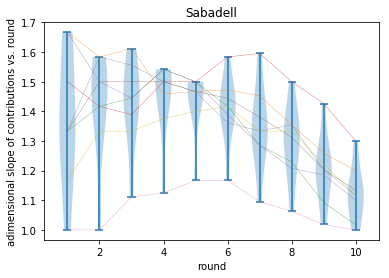

1.0 1.6666666666666667


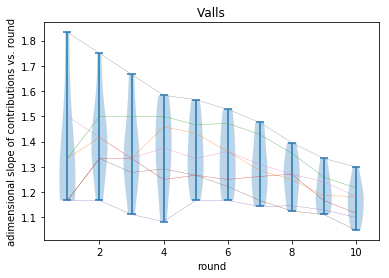

1.05 1.8333333333333333


In [5]:
for m in range(4):
    exec("rounddf="+cityvect[m]+"ronda")
    hurry=[[] for i in range(10)]
    for n in range(len(rounddf)):
        hurry[rounddf.loc[n,"num_ronda"]-1].append(10*(120-rounddf.loc[n,"bucket_final_ronda"])/(120*rounddf.loc[n,"num_ronda"]))
    plt.violinplot(hurry)
    for n in range(len(rounddf)):
        if (rounddf.loc[n,"num_ronda"]==1):
            rlzn=[]
        rlzn.append(10*(120-rounddf.loc[n,"bucket_final_ronda"])/(120*rounddf.loc[n,"num_ronda"]))
        if (rounddf.loc[n,"num_ronda"]==10):
            plt.plot([(i+1) for i in range(10)],rlzn,lw=0.3)
    plt.xlabel("round")
    plt.ylabel("adimensional slope of contributions vs. round")
    plt.title(cityname[m])
    plt.show()
    print(np.min(hurry),np.max(hurry))

In [20]:
for m in range(4):
    exec("sessiondf="+cityvect[m]+"partida")
    fails=0
    for k in range(len(sessiondf)):
        if(sessiondf.loc[k,"objectiu_aconseguit"]==0):
            fails+=1
    print("Games failed ("+cityname[m]+"):",fails)

Games failed (Girona): 0
Games failed (Lleida): 0
Games failed (Sabadell): 0
Games failed (Valls): 0
